# CLARAN - GMRT data example

Using input images from GMRT 610 MHz observations of EN1 field together with IR images of the same FoV from unWISE catalog. <br>

These images are stored in __/data/users/cmofokeng/data/gmrt/split_fits/test_1deg/__

In [1]:
import sys
import os
import os.path as osp
import glob
import re
sys.path.append('/users/cmofokeng/rgz_rcnn/tools/')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.table import unique
from astropy.io.votable import parse_single_table

from astropy.coordinates import SkyCoord
from scipy.ndimage.measurements import center_of_mass
#from matplotlib.path import Path
import matplotlib.patches as patches
from photutils import centroid_com
from astropy.wcs import WCS
from astropy.io import fits
from fuse_radio_ir import fuse
from IPython.display import Image

import cv2

In [2]:
# filename list of all files radio and ir .png files
import glob
radio_fits = glob.glob('/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_*[0-9].fits')
radio_png = glob.glob('/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_*[0-9]_logminmax.png')
ir_png = glob.glob('/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_*[0-9]_infrared.png')

In [3]:
radio_fits[:20]

['/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_5511.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_2269.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_5173.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_1080.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_5373.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_5524.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_64.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_3892.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_3869.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_4842.fits',
 '/idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_2450.fits',
 '/idia/users/cmofokeng/data/gmrt/

To classify radio source with CLARAN, run from terminal: <br>

__python3 ~/rgz_rcnn/tools/demo_gmrt.py --radio radio_fits --ir ir_png --catalog catalog_file_path__ 

from notebook: <br>

__%run ~/rgz_rcnn/tools/demo_gmrt.py --radio radio_fits --ir ir_png --catalog catalog_file_path__


_demo\_gmrt.py_ script is the adapted version of the original _demo.py_, _catalog_ argument above represents the file path of GMRT catalog, containing information about detected sources. <br>
GMRT catalog file path: __/data/users/cmofokeng/data/gmrt/en1w610-5sg9-clean-offset.vot__

In [4]:
radio_catalog = "/idia/users/cmofokeng/data/gmrt/en1w610-5sg9-clean-offset.vot"
t = parse_single_table(radio_catalog)
catalog_data = t.to_table(use_names_over_ids=True)

In [5]:
df = catalog_data.to_pandas()

In [6]:
df.head()

,Source_id,Isl_id,RA_deg,E_RA,Dec_deg,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,MRR13_Photometric_Redshift_Error_Free_A_V,MRR13_Photometric_Redshift_Error_A_V_0,SDSS_Spectroscopic_Redshift_Error,NED_Spectroscopic_Redshift_Error,SDSS_Source_Type_Flag,SDSS_Spec_Warning_Flag,SDSS_Spec_Class_Flag,SDSS_Catalog_Reliability_Flag,Spitzer_Catalog_Reliability_Flag,Separation
0,1,1,246.583386,0.000170,54.538691,0.000095,0.001343,0.000488,0.001453,0.000270,...,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,2,2,246.627523,0.000066,55.377850,0.000060,0.007705,0.000610,0.005425,0.000392,...,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2,4,4,246.556659,0.000183,54.877240,0.000211,0.005513,0.000671,0.002583,0.000481,...,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,5,5,246.543718,0.000153,54.869099,0.000094,0.052018,0.000962,0.007525,0.000325,...,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
4,6,6,246.484048,0.000033,54.131934,0.000029,0.007025,0.000335,0.005472,0.000209,...,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [17]:
%run ~/rgz_rcnn/tools/demo_gmrt.py --radio /idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_1569.fits --ir /idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_1569_infrared.png --catalog /idia/users/cmofokeng/data/gmrt/en1w610-5sg9-clean-offset.vot 

1.0 1.0
[(37.8437342699089, 90.0), (37.893051703633766, 90.10694829636624), (38.0, 90.33114458773909), (38.24157979330116, 90.75842020669883), (38.36716675728878, 91.0), (38.553532616414635, 91.44646738358539), (38.61941623293576, 91.61941623293576), (38.770308480773366, 92.0), (38.81717861094268, 92.18282138905732), (39.0, 92.94383051675985), (39.010308483673704, 92.98969151632629), (39.01228767688826, 93.0), (39.01409914435343, 93.01409914435344), (39.12410666747562, 93.87589333252437), (39.14008242105845, 94.0), (39.16455666570574, 94.16455666570573), (39.24195277112358, 94.75804722887642), (39.279520941185964, 95.0), (39.42823293922437, 95.42823293922437), (39.46308043221095, 95.53691956778906), (39.63758190117848, 96.0), (39.79652759999284, 96.20347240000716), (40.0, 96.43373711361846), (40.268395623332765, 96.73160437666724), (40.53781255658929, 97.0), (40.812399025697346, 97.18760097430267), (41.0, 97.3127087106186), (41.42250843351303, 97.57749156648698), (41.85738762695693, 97

### Viewing the output filename where ClaRAN's detections were saved:

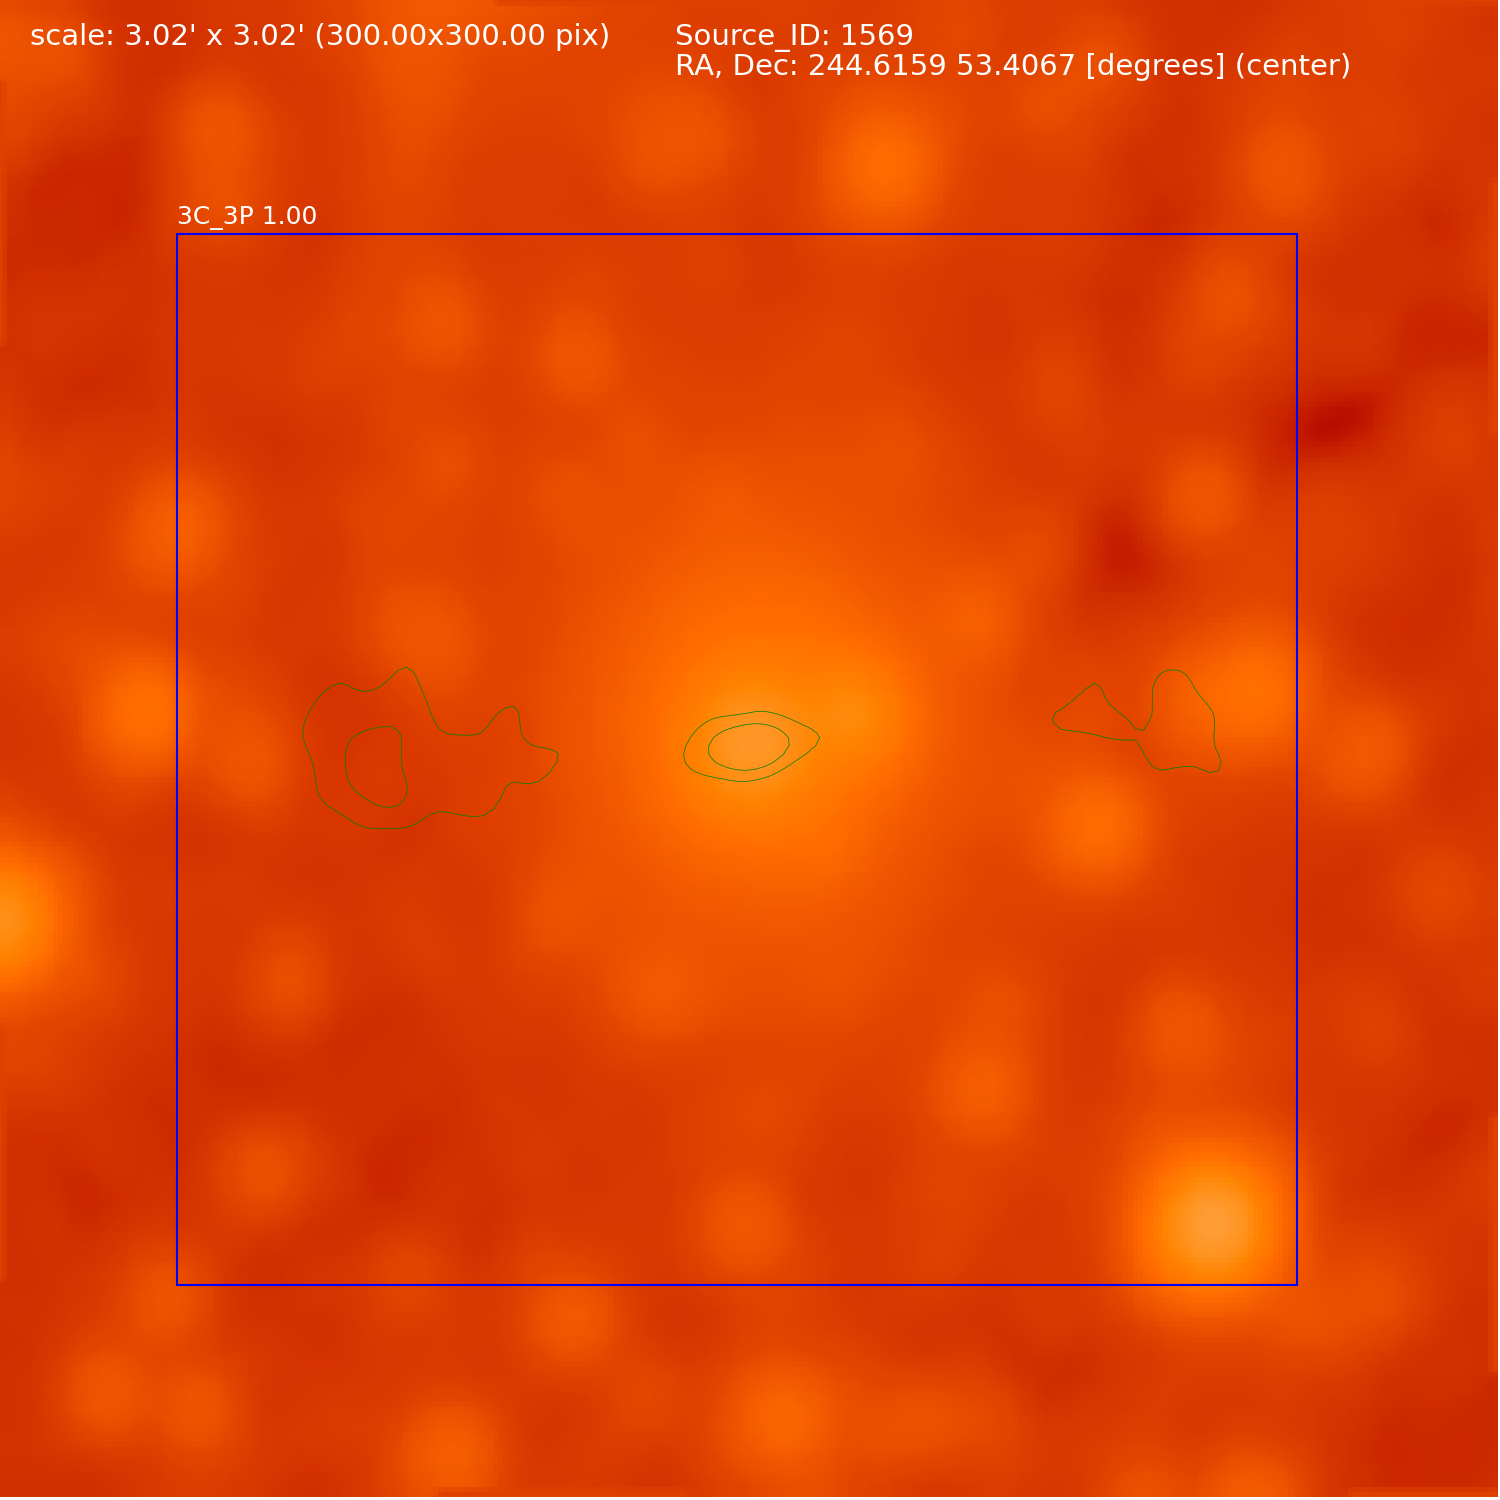

In [18]:
output_path = '.' #this is where the output of all the images strored
Image(filename=osp.join(output_path,'gmrt_en1w610_clipped_1569_infraredctmask_pred.png'))

We can also use ClaRAN on radio images only, by changing the command to be the following: <br>
__%run ~/rgz_rcnn/tools/demo_gmrt.py --radio radio_fits --radio-png radio_png_file --catalog radio_catalog__ <br>

the argument radio png represents the radio fits file converted to png.

In [23]:
%run ~/rgz_rcnn/tools/demo_gmrt.py --model D1  --radio /idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_1569.fits --radio-png /idia/users/cmofokeng/data/gmrt/split_fits/test_1deg/gmrt_en1w610_clipped_1569_logminmax.png --catalog /idia/users/cmofokeng/data/gmrt/en1w610-5sg9-clean-offset.vot 

RGZ root: '/users/cmofokeng/rgz_rcnn'
Loading RGZ model from /users/cmofokeng/rgz_rcnn/data/pretrained_model/rgz/D1/VGGnet_fast_rcnn-80000... INFO:tensorflow:Restoring parameters from /users/cmofokeng/rgz_rcnn/data/pretrained_model/rgz/D1/VGGnet_fast_rcnn-80000
Done in 1.141 seconds
Detecting radio sources... Done in 0.357 secs1.6574585635359116 1.6574585635359116
[(61.0993952810093, 149.17127071823205), (61.16166090745883, 149.33557666160192), (61.32596685082873, 149.74662852758132), (61.664494166282715, 150.49020196631395), (61.824034482356474, 150.82872928176795), (62.1384720517829, 151.64123448272213), (62.147495183339714, 151.66465951279287), (62.46730326583361, 152.48618784530387), (62.569435448651554, 152.90017781101696), (62.84833937197126, 154.0085603664464), (62.88192996311645, 154.14364640883977), (62.89365082575101, 154.23342099745338), (62.98342541436464, 154.87571972659288), (63.09967201950712, 155.68485836723318), (63.11598859097933, 155.8011049723757), (63.1355475947569

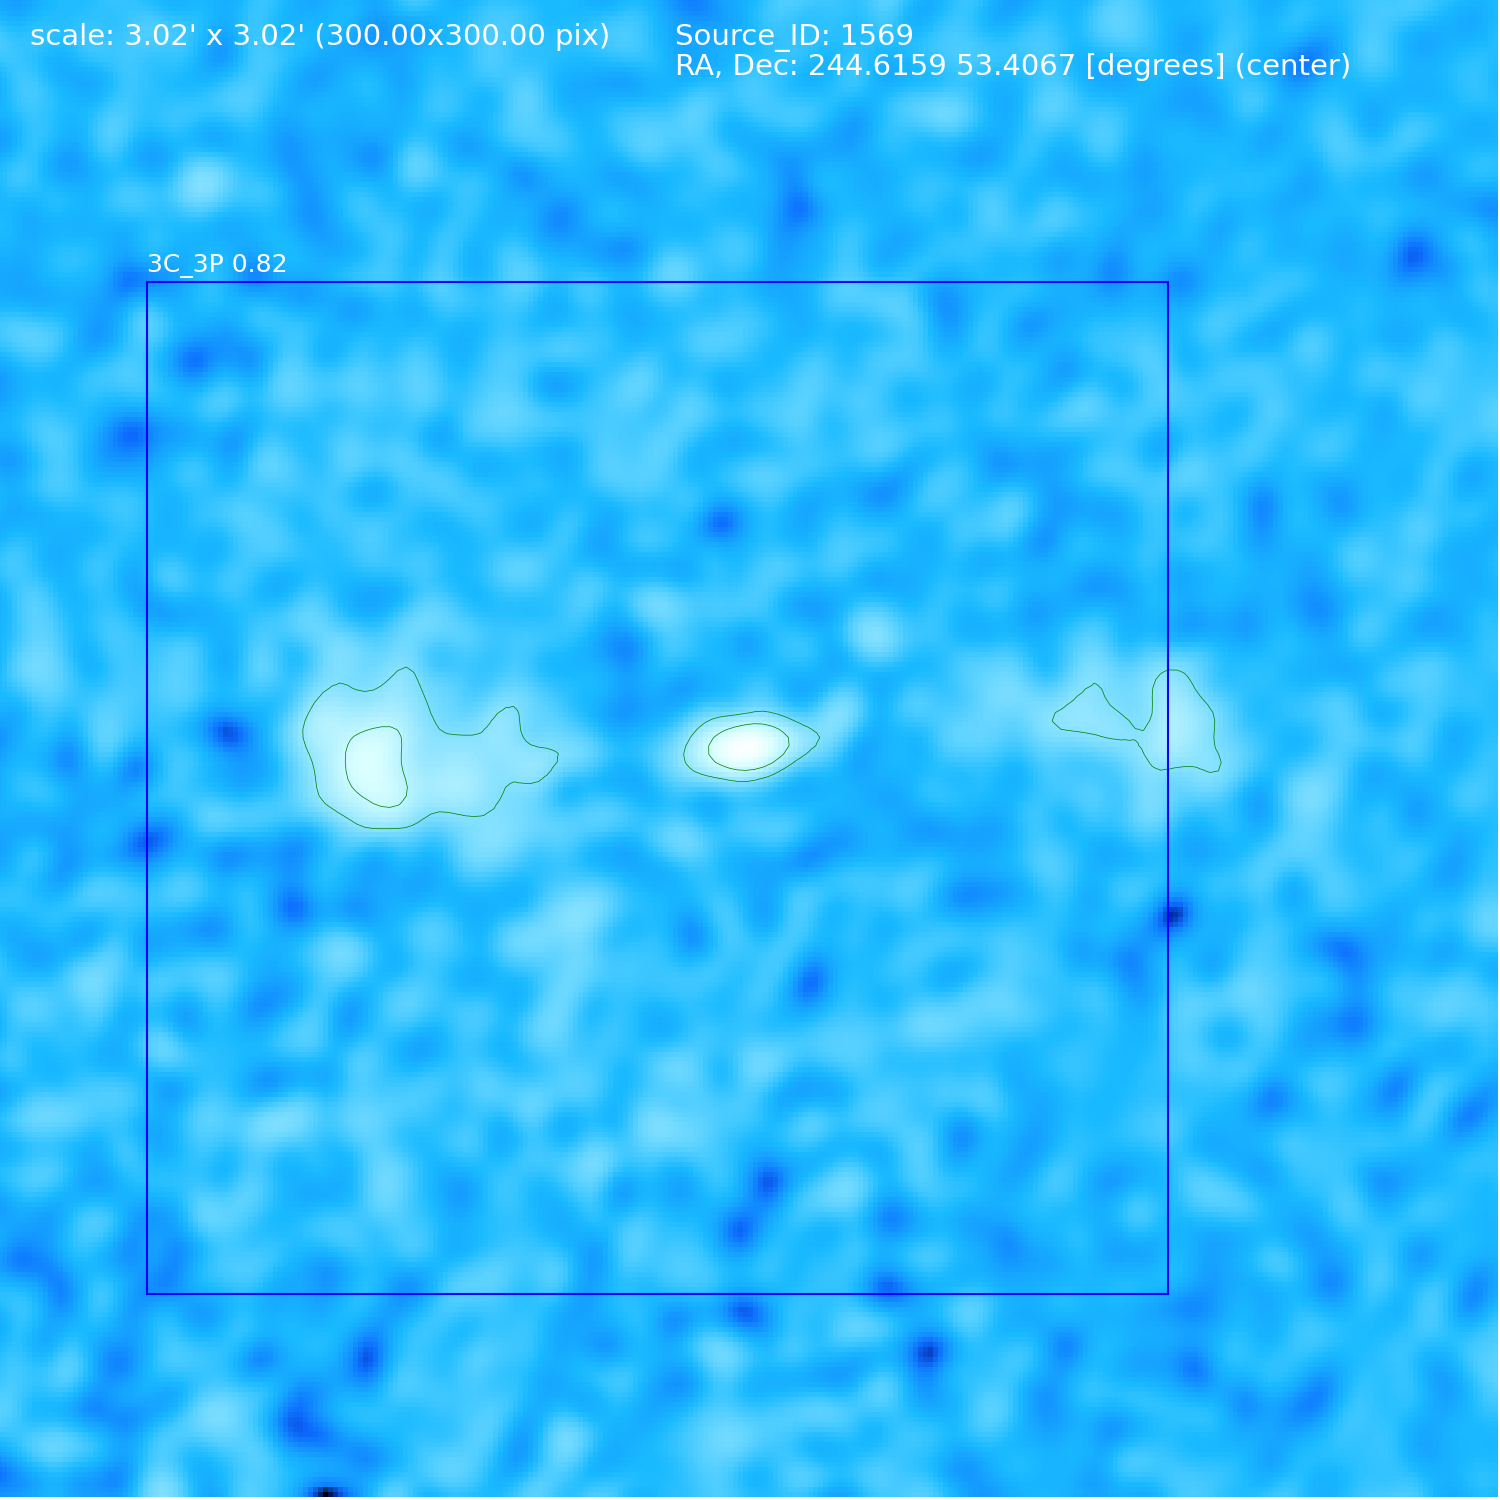

In [25]:
Image(filename=osp.join(output_path,'gmrt_en1w610_clipped_1569_logminmax_pred.png'))

For our course, CLARAN was used to directly classify data from GMRT telescope. Therefore, the CLARAN pipeline was tailored to our needs (_demo\_gmrt.py_) and as such had to automate the process of going through each cuotout. To do that, the above mentioned script was adapted to produce a csv file of all the predictions from CLARAN for each cutout. All these predictions were grouped into a catalog, which was then preprocessed and filtered before producing the final sample of output images.

_vis\_dets.py_ script does the above task, it requries two files: 1. a (full) catalog of all the predictions and 2. a (final) catalog post preprocessing and filtering steps, both in csv format. This script produces the final sample ("uninque detections") of output images

To get the radio source positions and their corresponding IR counterparts of the detected sources in the final catalog, a _source\_positions.py_ script is used. This script uses the final catalog and the csv files of the IR sources found in each of the cutout, from there the IR host for each detected radio source in the catalog is estimate. Moreover, this script is used to produce a visualization showing the detected source and their hosts, also a names and positions of these hosts are added to the final catalog.